In [10]:
!pip install pingouin

     ------------------------------------ 198.6/198.6 kB 710.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=c78039fee4b8df2d334fdc10e6217b40fc054f134e79b52494e99b6175e3c035
  Stored in directory: c:\users\i'm\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [4]:
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Load dataset from Excel file
data_file = '1SPM.xlsx'
df = pd.read_excel(data_file)
df.head()

,Software,Knee_angle
0,A,6.284240
1,A,7.005107
2,A,7.767563
3,A,8.502293
4,A,9.250886


In [6]:
aov = pg.anova(data = df,dv ='Knee_angle',between = 'Software',detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Software,3132.768365,2,1566.384183,5.652647,0.003896,0.036669
1,Within,82300.571461,297,277.106301,NaN,NaN,NaN


In [10]:
tuk = pg.pairwise_tukey(dv = 'Knee_angle',between = 'Software',effsize = 'cohen',data = df )
tuk

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,A,B,18.009693,12.923035,5.086658,2.354172,2.160699,0.079767,0.289946
1,A,C,18.009693,10.214130,7.795563,2.354172,3.311382,0.002988,0.454878
2,B,C,12.923035,10.214130,2.708905,2.354172,1.150683,0.483740,0.178680


In [16]:
!pip install statsmodels
import statsmodels.stats.multitest as smm

pvals = [0.08, 0.002988, 0.48374]
X = smm.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False)
print(X)


(array([False,  True, False]), array([0.24    , 0.008964, 1.      ]), 0.016952427508441503, 0.016666666666666666)


In [19]:
from matplotlib import pyplot
from spm1d import io, stats
YA = io.load(df['Software']); YA.smooth(2.0)
YB = io.load(df['Knee_angle']); YB.smooth(2.0)
SPMt = stats.ttest2(YA,YB)
SPMti = SPMt.inference(height = 3.0)
pyplot.figure( )
YA.mean( ).plot( )
YB.mean( ).plot(color = 'r')
pyplot.figure( )
SPMti.plot( )

DeprecationWarning: "spm1d.io.load" has been deprecated.  The "spm1d.io" module will be removed in the future.

In [20]:
!pip install spm1d

In [26]:
import pandas as pd
from spm1d import stats

# Load the data from the Excel workbook
data = pd.read_excel('your_data_file.xlsx', sheet_name='Sheet1')

# Extract the variables for each category
YA = data[data['Software'] == 'A']['Knee_angle']
YB = data[data['Software'] == 'B']['Knee_angle']
YC = data[data['Software'] == 'C']['Knee_angle']

# Perform smoothing if desired
YA_smooth = YA.rolling(window=3, min_periods=1).mean()
YB_smooth = YB.rolling(window=3, min_periods=1).mean()
YC_smooth = YC.rolling(window=3, min_periods=1).mean()

# Perform the t-tests for each category
SPMt_AB = stats.ttest2(YA_smooth, YB_smooth)
SPMt_AC = stats.ttest2(YA_smooth, YC_smooth)
SPMt_BC = stats.ttest2(YB_smooth, YC_smooth)

# Retrieve the t-values and p-values for each category comparison
T_AB = SPMt_AB.inference()[0]
P_AB = SPMt_AB.inference()[1]
T_AC = SPMt_AC.inference()[0]
P_AC = SPMt_AC.inference()[1]
T_BC = SPMt_BC.inference()[0]
P_BC = SPMt_BC.inference()[1]

# Print the t-values and p-values for each category comparison
print('T-values (A vs B):', T_AB)
print('P-values (A vs B):', P_AB)
print('T-values (A vs C):', T_AC)
print('P-values (A vs C):', P_AC)
print('T-values (B vs C):', T_BC)
print('P-values (B vs C):', P_BC)

FileNotFoundError: [Errno 2] No such file or directory: 'your_data_file.xlsx'

In [1]:
import pandas as pd

In [13]:
data1 = pd.read_csv('Analysis_data.csv')
data1.head()

,Percentage of GAIT cycle,A,B,C
0,1,6.284240,2.3000,0.473136
1,2,7.005107,3.0280,0.015310
2,3,7.767563,3.0280,0.302547
3,4,8.502293,3.5980,0.447786
4,5,9.250886,4.0894,0.593342


In [20]:
data1['ABS_diffA&B'] = pd.Series(data['A'] - data['B'])
data1.head()
data1['ABS_diffB&C'] = pd.Series(data['B'] - data['C'])
data1.head()

,Percentage of GAIT cycle,A,B,C,ABS_diffA&B,ABS_diffA&C,ABS_diffB&C
0,1,6.284240,2.3000,0.473136,3.984240,5.811104,1.826864
1,2,7.005107,3.0280,0.015310,3.977107,6.989797,3.012690
2,3,7.767563,3.0280,0.302547,4.739563,7.465017,2.725453
3,4,8.502293,3.5980,0.447786,4.904293,8.054507,3.150214
4,5,9.250886,4.0894,0.593342,5.161486,8.657544,3.496058


In [21]:
SAEB = data1['ABS_diffA&B'].sum(axis = 0)
SAEB

508.6657709900001

In [22]:
SAEC = data1['ABS_diffB&C'].sum(axis = 0)
SAEC

270.890500144

In [23]:
MAEB = SAEB/100
MAEC = SAEC/100
print(MAEB)
print(MAEC)

5.086657709900001
2.70890500144


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

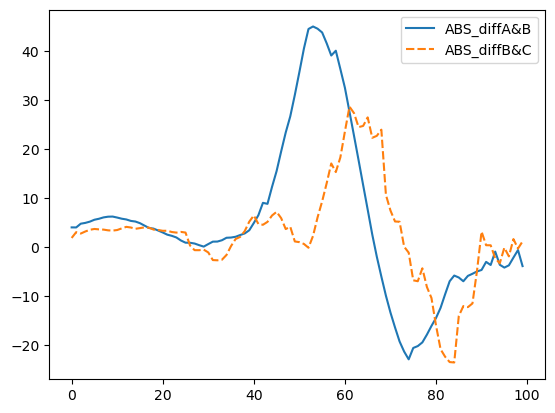

In [25]:
sns.lineplot(data=data1[['ABS_diffA&B','ABS_diffB&C']])
plt.show()

In [30]:
data1['RSE_A_B'] = data1['ABS_diffA&B']**2
data1['RSE_B_C'] = data1['ABS_diffB&C']**2
data1.head()

,Percentage of GAIT cycle,A,B,C,ABS_diffA&B,ABS_diffA&C,ABS_diffB&C,RMSE_A_B,RMSE_A_C,RSE_A_B,RSE_A_C,RSE_B_C
0,1,6.284240,2.3000,0.473136,3.984240,5.811104,1.826864,15.874170,33.768933,15.874170,33.768933,3.337433
1,2,7.005107,3.0280,0.015310,3.977107,6.989797,3.012690,15.817383,48.857262,15.817383,48.857262,9.076299
2,3,7.767563,3.0280,0.302547,4.739563,7.465017,2.725453,22.463458,55.726472,22.463458,55.726472,7.428097
3,4,8.502293,3.5980,0.447786,4.904293,8.054507,3.150214,24.052091,64.875087,24.052091,64.875087,9.923849
4,5,9.250886,4.0894,0.593342,5.161486,8.657544,3.496058,26.640937,74.953070,26.640937,74.953070,12.222423


In [32]:
data_1 = data1.drop(['ABS_diffA&C','RMSE_A_C','RMSE_A_B','RSE_A_C'],axis = 1)
data_1.head()

,Percentage of GAIT cycle,A,B,C,ABS_diffA&B,ABS_diffB&C,RSE_A_B,RSE_B_C
0,1,6.284240,2.3000,0.473136,3.984240,1.826864,15.874170,3.337433
1,2,7.005107,3.0280,0.015310,3.977107,3.012690,15.817383,9.076299
2,3,7.767563,3.0280,0.302547,4.739563,2.725453,22.463458,7.428097
3,4,8.502293,3.5980,0.447786,4.904293,3.150214,24.052091,9.923849
4,5,9.250886,4.0894,0.593342,5.161486,3.496058,26.640937,12.222423


In [37]:
RMSE_A_B = data_1['RSE_A_B'].sum(axis = 0)/100
R = RMSE_A_B**0.5
R

16.815820470183887

In [38]:
RMSE_B_C = data_1['RSE_B_C'].sum(axis = 0)/100
Q = RMSE_B_C**0.5
Q

10.455465808984654

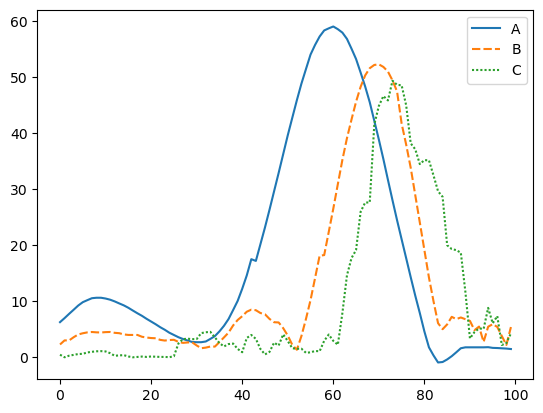

In [40]:
sns.lineplot(data = data_1[['A','B','C']])
plt.show()

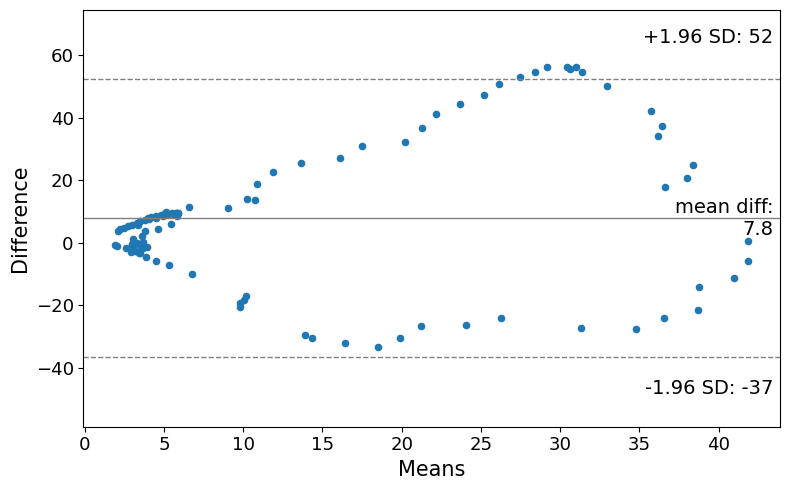

In [41]:
#Bland-Altman plots
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(data_1.A, data_1.C, ax = ax)
plt.show()

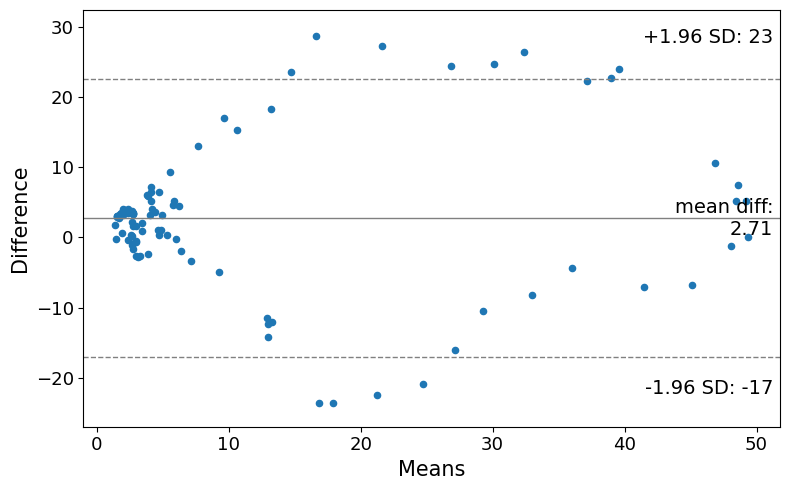

In [42]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(data_1.B, data_1.C, ax = ax)
plt.show()

In [44]:
from scipy.stats import pearsonr
list1 = data_1['A']
list2 = data_1['C']
list3 = data_1['B']
corr, _ = pearsonr(list1, list2)
corr_1, _ = pearsonr(list3, list2)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation: %.3f' % corr_1)

Pearsons correlation: 0.123
Pearsons correlation: 0.777


In [45]:
!pip install -U nilearn

     ---------------------------------------- 10.3/10.3 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 7.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall -U nilearn

In [ ]:
!pip install nistats

In [ ]:
from nistats import design_matrix, FirstLevelModel

In [ ]:
percentage = data1['Percentage of gait cycle']
software_A = data1['A']
software_B = data1['B']
software_C = data1['C']
model = FirstLevelModel()
model.fit(percentage, design_matrix=design_matrix)

In [ ]:
contrast = ['Software_A', 'Software_B']  # Example contrast between Software A and Software B
z_image = model.compute_contrast(contrast)